In [5]:
import seml
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd


In [2]:
from anndata import AnnData


In [3]:
from scipy.sparse import csr_matrix

In [4]:
adata = AnnData(csr_matrix((100,1)))

/tmp/ipykernel_15799/617300718.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(csr_matrix((100,1)))


In [8]:
adata.obs_names = ["a"+str(n) for n in adata.obs_names]

In [9]:
adata.obs_names

Index(['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10',
       'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20',
       'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30',
       'a31', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40',
       'a41', 'a42', 'a43', 'a44', 'a45', 'a46', 'a47', 'a48', 'a49', 'a50',
       'a51', 'a52', 'a53', 'a54', 'a55', 'a56', 'a57', 'a58', 'a59', 'a60',
       'a61', 'a62', 'a63', 'a64', 'a65', 'a66', 'a67', 'a68', 'a69', 'a70',
       'a71', 'a72', 'a73', 'a74', 'a75', 'a76', 'a77', 'a78', 'a79', 'a80',
       'a81', 'a82', 'a83', 'a84', 'a85', 'a86', 'a87', 'a88', 'a89', 'a90',
       'a91', 'a92', 'a93', 'a94', 'a95', 'a96', 'a97', 'a98', 'a99'],
      dtype='object')

In [6]:
output_dir = "figures"

# CPU

In [7]:
results = seml.get_results('scg_time_correct', to_data_frame=True)

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

In [8]:
def adapt_model(x):
    if x["config.model"] == "WOT":
        return "WOT"
    rank = x["config.rank"]
    gamma = x["config.gamma"]
    if not pd.isna(x["config.batch_size"]):
        if rank==-1:
            return "moscot_online"
        return f"moscot_online_{rank}_{gamma}"
    if rank==-1:
        return "moscot"
    return f"moscot_{rank}_{gamma}"
    
results["model_adapted"] = results.apply(lambda x: adapt_model(x), axis=1)

In [9]:
def adapt_error(x):
    if isinstance(x['result.error'], np.ndarray):
        return x['result.error'][0]
    return x['result.error']

results["error_adapted"] = results.apply(lambda x: adapt_error(x), axis=1)

In [10]:
dic = {}
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_1024.h5ad"] = 1024+256
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_2048.h5ad"] = 2048+512
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_4096.h5ad"] = 4096+1024
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_8192.h5ad"] = 8192+2048
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_16384.h5ad"] = 16384+4096
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_32768.h5ad"] = 32768+8192
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_65536.h5ad"] = 65536+16384
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_131072.h5ad"] = 131072+32768

In [11]:
import pandas as pd
results["n_cells"] = results["config.fpath"].map(dic)

In [12]:
import seaborn as sns
sns.set_style("whitegrid", {'xtick.direction': 'out', 'xtick.major.size': 5.0, 'xtick.minor.size': 5.0,
    'ytick.color': '.15', 'ytick.direction': 'out', 'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 
                           'font.family': ['DejaVu Sans'], 'font.scale': 1})
palette = 'deep'

In [13]:
labels_dict = {}

labels_dict["WOT"] = "WOT"
labels_dict["moscot"] = "moscot"
labels_dict["moscot_online"] = "moscot online"
labels_dict['moscot_50.0_10.0'] = "on-moscot, r50"
labels_dict['moscot_200.0_10.0'] = "on-moscot, r200"
labels_dict['moscot_1000.0_10.0'] = "on-moscot, r1000"
labels_dict['moscot_online_50.0_10.0'] = "moscot, r50"
labels_dict['moscot_online_200.0_10.0'] = "moscot, r200"
labels_dict['moscot_online_1000.0_10.0'] = "moscot, r1000"

In [14]:
results["result.converged"]

0        2
1        2
2        2
3        2
4        2
      ... 
65    True
66    True
67    True
68    True
69    True
Name: result.converged, Length: 70, dtype: object

In [15]:

d = results[~results["config.gamma"].isin([0.01,0.1,1,100])]

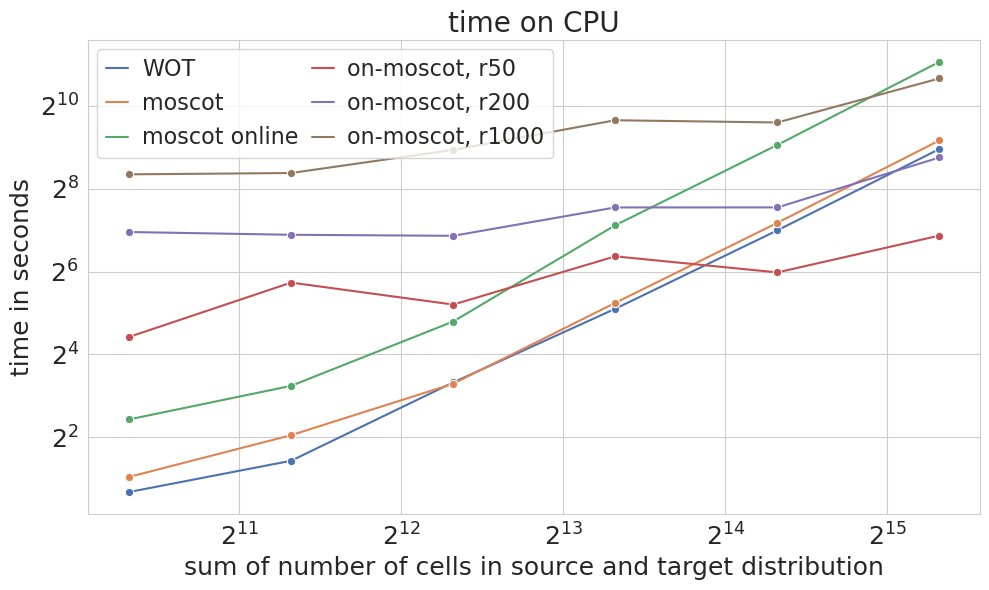

In [16]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.lineplot(x='n_cells', y='result.benchmark_result', hue="model_adapted", err_style="bars", marker='o',
                     data=d, ax=axs, palette=palette, markers=True)
plt.xscale('log', base=2)
plt.yscale('log', base=2)
handles, _labels = axs.get_legend_handles_labels()

labels = [*map(labels_dict.get, _labels)]

axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=2, loc='upper left', 
            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('time in seconds', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("time on CPU", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()
#if save_figure:
#    plt.savefig(FIG_DIR + f'/fig_2_b.jpg', dpi=300)
plt.show()

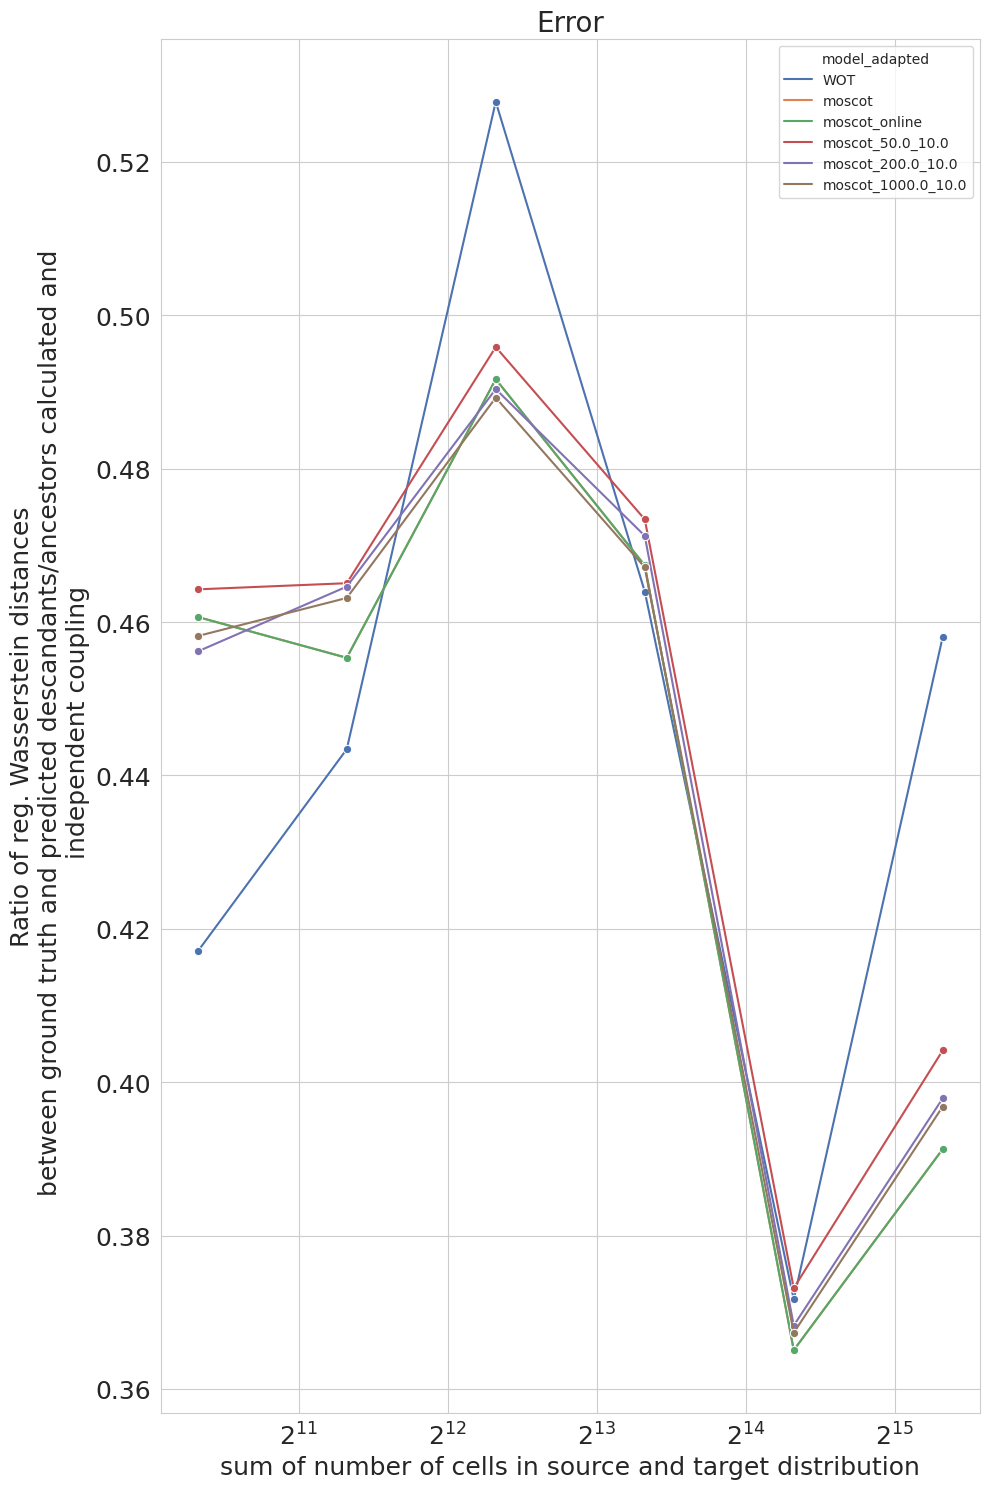

In [17]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)*2.5))
pl = sns.lineplot(x='n_cells', y='error_adapted', hue="model_adapted", marker='o', 
                     data=d, ax=axs, palette=palette, markers=True)
plt.xscale('log', base=2)
handles, _labels = axs.get_legend_handles_labels()

#labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('Ratio of reg. Wasserstein distances\n between ground truth and predicted descandants/ancestors calculated and\n independent coupling', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("Error", fontsize=20)
_, xlabels = plt.xticks()

#axs.text("Error: ratio of Wasserstein distances between ground truth and predictions obtained by the calculated OT map and predictions obtained by the independent coupling.")




plt.tight_layout()